# Taller 2

El siguiente taller es elaborado por:  <br/>
Johana Alejandra Rátiva <br/>
Juan Manuel Rivera <br/>


**Contexto:** La empresa HabitAlpes tiene un portafolio variado para el sector inmobiliario. Actualmente buscan implementar una herramienta para el calculo de precio de venta de apartamentos en la ciudad de Bogotá.

**Escenario actual:** 
* El calculo del precio de venta del inmueble toma 6 horas de trabajo de un perito ( $ 9500 por hora ). 
* HabitAlpes avalua 500 apartamentos al mes 

<span style="color:red; font-weight:bold;">Objetivo:</span> Usar un algoritmo de machine learning capaz de estimar el precio de un inmueble que permita al perito realizar su trabajo en 1 hora. 

**Implicaciones previstas:** 
* Por cada avaluo subestimado en más de 20M el cliente solicitará un avalúo presencial
* Las sobreestimaciones no son reportadas

In [81]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Entendimiento y preparación de los datos

In [82]:
pd.set_option('display.max_rows', 15)
pd.set_option('display.max_columns', 100)

pd.set_option('display.float_format', '{:,.0f}'.format)

df = pd.read_csv('C:/Users/jmriv/Documents/Ciencia de Datos - Repos/Tutorial regresión/apartamentos.csv')
df.head()

,_id,codigo,tipo_propiedad,tipo_operacion,precio_venta,area,habitaciones,banos,administracion,parqueaderos,sector,estrato,antiguedad,latitud,longitud,direccion,descripcion,website,last_view,datetime,url,timeline,estado,compañia,precio_arriendo,jacuzzi,piso,closets,chimenea,permite_mascotas,gimnasio,ascensor,conjunto_cerrado,piscina,salon_comunal,terraza,vigilancia,coords_modified,localidad,barrio,estacion_tm_cercana,distancia_estacion_tm_m,is_cerca_estacion_tm,parque_cercano,distancia_parque_m,is_cerca_parque
0,66d86c7eceda690e85508760,4133491,APARTAMENTO,VENTA,"339,000,000",76,3,2,"300,000",1,BRITALIA,3,ENTRE 10 Y 20 ANOS,5,-74,CARRERA 55A # 163-35,"apartamento en venta de 76m2, con vista exteri...",habi.co,2024-08-13 10:34:47.315,2024-07-03 23:27:30.843,https://habi.co/page-data/venta-apartamentos/1...,[{'fecha': {'$date': '2024-07-03T23:27:30.843Z...,NaN,NaN,NaN,0,NaN,NaN,0,0,0,0,1,0,0,0,0,False,SUBA,URB. PICADELLY,Toberin - Foundever,"1,142",0,PARQUE VECINAL DESARROLLO CANTALEJO URBANIZACI...,426,1
1,66d86c7eceda690e85508761,3889852,APARTAMENTO,VENTA,"223,000,000",63,3,2,NaN,0,SAN CRISTOBAL NORTE,3,MAS DE 20 ANOS,5,-74,CARRERA 7F # 153 - 75,"apartamento en venta de 60m2, con vista interi...",habi.co,2024-09-03 23:46:46.547,2024-07-03 23:27:31.667,https://habi.co/page-data/venta-apartamentos/1...,[],NaN,NaN,NaN,0,NaN,NaN,0,0,0,0,0,0,0,0,0,False,USAQUEN,BARRANCAS PERLAS DEL NORTE,Mazurén,"2,385",0,PARQUE ZONAL ALTA BLANCA,472,1
2,66d86c7eceda690e85508762,4386770,APARTAMENTO,VENTA,"440,898,168",54,3,2,"305,000",0,LA SABANA,3,ENTRE 0 Y 5 ANOS,5,-74,CARRERA 69C #2 - 60,"apartamento en venta de 54m2, con vista exteri...",habi.co,2024-07-10 18:19:39.749,2024-07-03 23:27:31.886,https://habi.co/page-data/venta-apartamentos/1...,[],NaN,NaN,NaN,0,NaN,NaN,0,0,0,0,1,0,0,0,0,False,LOS MARTIRES,SAN VICTORINO,De La Sabana,232,1,PARQUE METROPOLITANO TERCER MILENIO,961,0
3,66d86c7eceda690e85508763,4210060,APARTAMENTO,VENTA,"158,000,000",43,2,2,"106,600",0,TIBABUYES,2,ENTRE 10 Y 20 ANOS,5,-74,CALLE 131C # 126-95,"apartamento en venta de 43 m2, con vista inter...",habi.co,2024-07-10 18:19:03.061,2024-07-03 23:27:32.141,https://habi.co/page-data/venta-apartamentos/1...,[],NaN,NaN,NaN,0,NaN,NaN,0,0,0,0,1,0,0,0,0,False,SUBA,LA ESTRELLA II,Portal Suba,"2,275",0,PARQUE ZONAL LA GAITANA,540,0
4,66d86c7eceda690e85508764,4063762,APARTAMENTO,VENTA,"222,800,000",48,3,2,"151,000",0,VERBENAL,3,MAS DE 20 ANOS,5,-74,CARRERA 5 # 187-15,"apartamento duplex en venta de 48m2, con vista...",habi.co,2024-09-03 23:46:46.592,2024-07-03 23:27:32.361,https://habi.co/page-data/venta-apartamentos/1...,[],NaN,NaN,NaN,0,NaN,NaN,0,0,0,0,1,0,0,0,0,False,USAQUEN,HORIZONTES USAQUEN,Terminal,"2,099",0,PARQUE VECINAL DESARROLLO VERBENAL I,"1,661",0


In [83]:
print(df.shape)
df.info()

(43013, 46)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43013 entries, 0 to 43012
Data columns (total 46 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   _id                      43013 non-null  object 
 1   codigo                   43013 non-null  object 
 2   tipo_propiedad           43013 non-null  object 
 3   tipo_operacion           43013 non-null  object 
 4   precio_venta             27584 non-null  float64
 5   area                     43013 non-null  float64
 6   habitaciones             43012 non-null  float64
 7   banos                    43012 non-null  float64
 8   administracion           35088 non-null  float64
 9   parqueaderos             43012 non-null  float64
 10  sector                   41372 non-null  object 
 11  estrato                  43012 non-null  float64
 12  antiguedad               43003 non-null  object 
 13  latitud                  43013 non-null  float64
 14  longitud  

In [84]:
df[["tipo_propiedad","tipo_operacion"]].value_counts()

tipo_propiedad             tipo_operacion  
APARTAMENTO                VENTA               27200
                           ARRIENDO            15515
                           VENTA Y ARRIENDO      228
CASA CON CONJUNTO CERRADO  VENTA                  60
CASA                       VENTA                  10
Name: count, dtype: int64

In [85]:
pd.set_option('display.float_format', '{:,.6f}'.format)
df[["tipo_propiedad","tipo_operacion"]].value_counts(normalize=True)

tipo_propiedad             tipo_operacion  
APARTAMENTO                VENTA              0.632367
                           ARRIENDO           0.360705
                           VENTA Y ARRIENDO   0.005301
CASA CON CONJUNTO CERRADO  VENTA              0.001395
CASA                       VENTA              0.000232
Name: proportion, dtype: float64

**Notas:**  

* La base de datos cuenta con  <span style="color:red; font-weight:bold;">43013 registros y 46 columnas.</span> 

* Se puede evidenciar que en su mayoría se tiene registro de inmuebles de tipo "APARTAMENTO". con tipo de oferta "VENTA" esta característica combinada representa un 63% de los datos lo cual es un buen incio para abordar el caso de negocio actual.

* Se propone filtrar la base de datos con estas características dado que la variable respuesta debe ser precio de venta para inmuebles de tipo apartamento.

(Se deja como opción analizar el ratio de los inmuebles con doble oferta (venta y arriendo) para obtener un ratio que permita imputar la variable precio_venta a partir de la operacion ( precio_arriendo * ratio ) de presentarse la necesidad de contar con mas datos.) (Ratio sugerido: 0.006)

In [86]:
pd.set_option('display.float_format', '{:,.6f}'.format)
df["ratio_inmobiliario"]=df.loc[(~df["precio_arriendo"].isna()) & (~df["precio_venta"].isna()),
       "precio_arriendo"] / df.loc[(~df["precio_arriendo"].isna()) & (~df["precio_venta"].isna()),
                                 "precio_venta"]
df["ratio_inmobiliario"].describe(percentiles=[0.01,0.05,0.25,0.5,0.75,0.9,0.99])

count   403.000000
mean      0.138381
std       0.476284
min       0.000004
1%        0.002526
5%        0.003534
25%       0.004581
50%       0.005185
75%       0.006107
90%       0.881688
99%       1.263752
max       5.142857
Name: ratio_inmobiliario, dtype: float64

In [87]:
# Filtar el dataframe para inmuebles tipo APARTAMENTO y operacion VENTA o VENTA Y ARRIENDO
df =df.loc[(df["tipo_propiedad"]=="APARTAMENTO") & (df["tipo_operacion"].isin(['VENTA','VENTA Y ARRIENDO']))]
df.shape

(27428, 47)

In [88]:
# Prueba de consistencia después del filtrado
df.loc[df["precio_venta"].isna()]

,_id,codigo,tipo_propiedad,tipo_operacion,precio_venta,area,habitaciones,banos,administracion,parqueaderos,sector,estrato,antiguedad,latitud,longitud,direccion,descripcion,website,last_view,datetime,url,timeline,estado,compañia,precio_arriendo,jacuzzi,piso,closets,chimenea,permite_mascotas,gimnasio,ascensor,conjunto_cerrado,piscina,salon_comunal,terraza,vigilancia,coords_modified,localidad,barrio,estacion_tm_cercana,distancia_estacion_tm_m,is_cerca_estacion_tm,parque_cercano,distancia_parque_m,is_cerca_parque,ratio_inmobiliario


<span style="color:red; font-weight:bold;">La base filtrada tiene 27428 registros de apartamentos con valores de venta diligenciados</span> 

## Analisis Exploratorio

C:\Users\jmriv\AppData\Local\Temp\ipykernel_14924\3974092739.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='Set2')
C:\Users\jmriv\AppData\Local\Temp\ipykernel_14924\3974092739.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='Set2')
C:\Users\jmriv\AppData\Local\Temp\ipykernel_14924\3974092739.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='Set2')
C:\Users\jmriv\AppData\Local\Temp\ipykernel_14924\3974092739.py:12: FutureWarning: 

Passing `palette` 

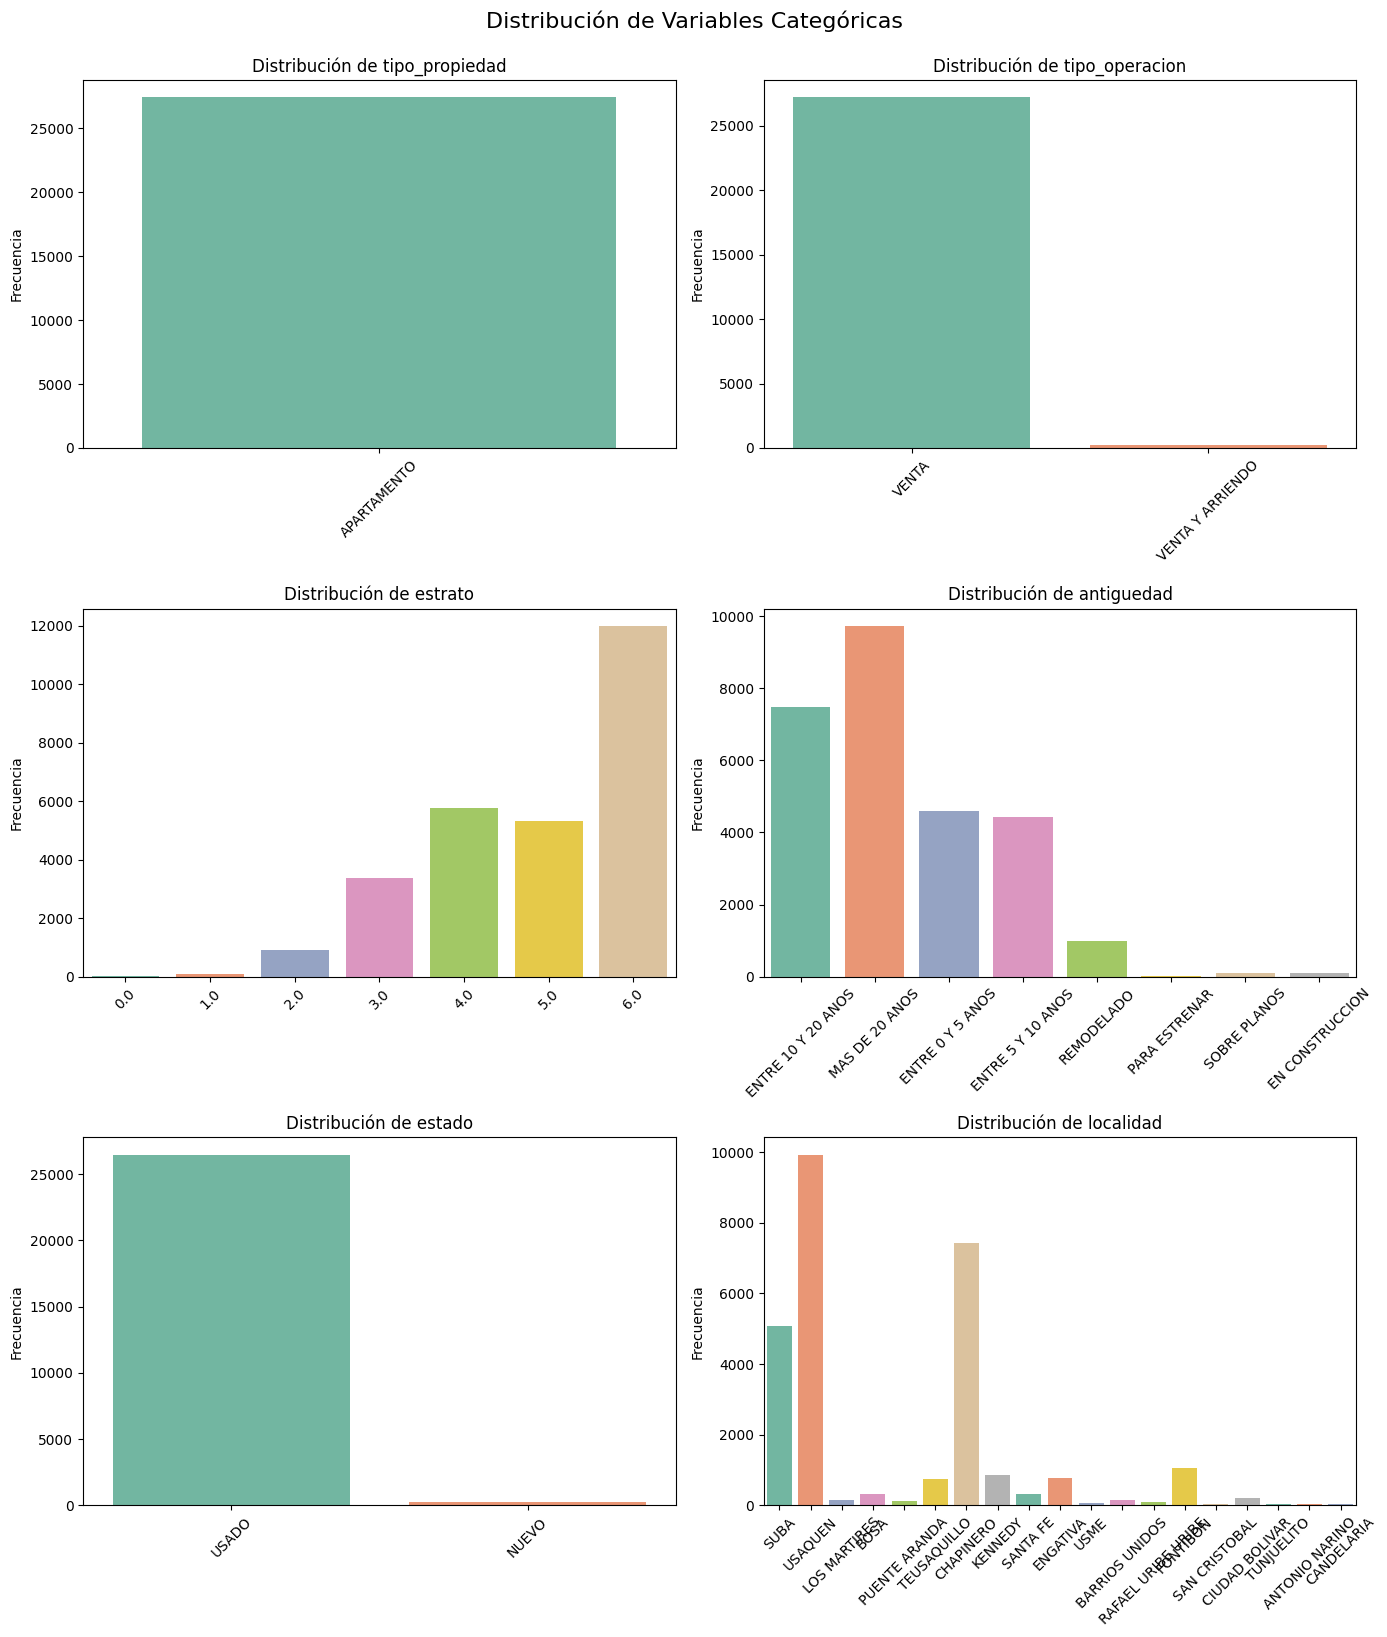

In [89]:
# Graficar distribuciones de variables categóricas
columnas_categoricas = ['tipo_propiedad','tipo_operacion','estrato',
                        'antiguedad','estado','localidad']

num_cols = 2  # columnas de subplots
num_rows = (len(columnas_categoricas) + 1) // num_cols  # filas necesarias

plt.figure(figsize=(14, 16))

for i, col in enumerate(columnas_categoricas, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.countplot(data=df, x=col, palette='Set2')
    plt.title(f'Distribución de {col}')
    plt.xlabel('')
    plt.ylabel('Frecuencia')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.suptitle("Distribución de Variables Categóricas", fontsize=16, y=1.02)
plt.show()

C:\Users\jmriv\AppData\Local\Temp\ipykernel_14924\1194927509.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top5.index, y=top5.values, palette='Set3')
C:\Users\jmriv\AppData\Local\Temp\ipykernel_14924\1194927509.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top5.index, y=top5.values, palette='Set3')
C:\Users\jmriv\AppData\Local\Temp\ipykernel_14924\1194927509.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top5.index, y=top5.values, palette='Set3')
C:\Users\jmriv\AppData\Local\Temp\ipykernel_14924\1194927509.py:15: Fu

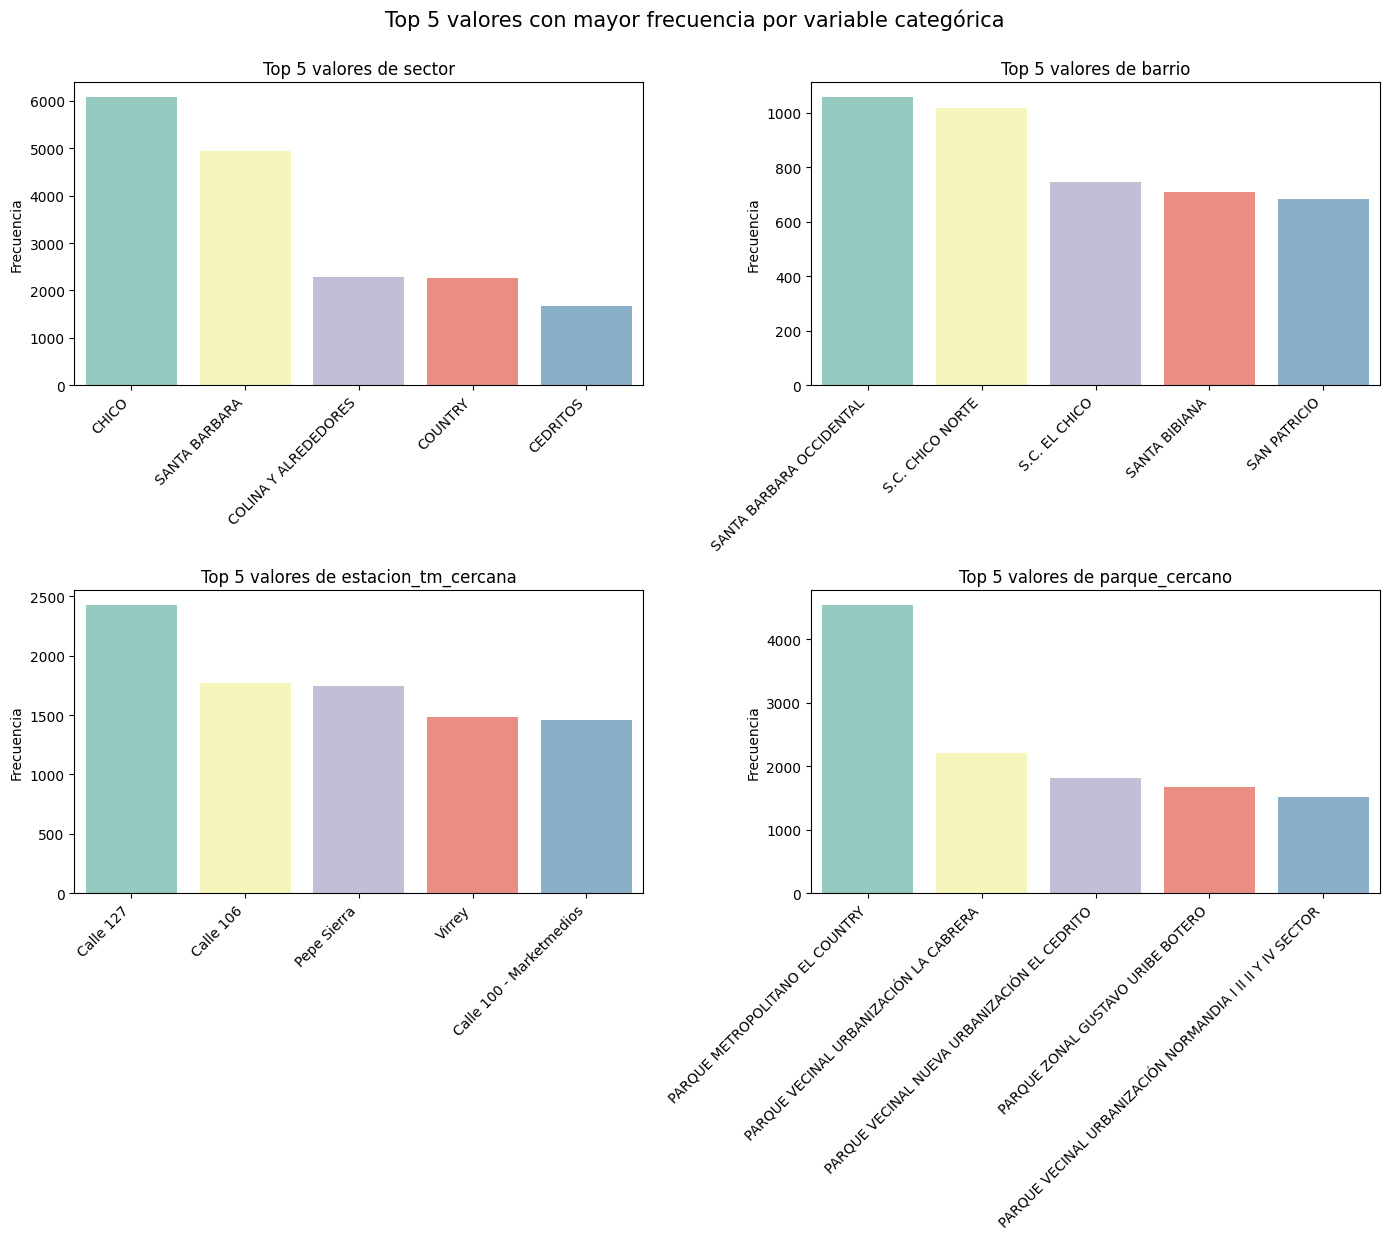

In [90]:
# Variables ccategoricas adicionales que contienen muchas clases por lo cual se priorizan las top 5
import matplotlib.pyplot as plt
import seaborn as sns

columnas_top5 = ['sector', 'barrio', 'estacion_tm_cercana', 'parque_cercano']

plt.figure(figsize=(14, 12))

for i, col in enumerate(columnas_top5, 1):
    plt.subplot(2, 2, i)

    # Obtener top 5 valores más frecuentes
    top5 = df[col].value_counts().nlargest(5)

    sns.barplot(x=top5.index, y=top5.values, palette='Set3')
    plt.title(f'Top 5 valores de {col}')
    plt.ylabel('Frecuencia')
    plt.xlabel('')
    plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.suptitle('Top 5 valores con mayor frecuencia por variable categórica', y=1.03, fontsize=15)
plt.show()


Notas:

<span style="color:red; font-weight:bold;">Descripción de variables categoricas: </span> 

* Estrato: Aunque existen inmuebles publicados en todos los estratos, se observa un predominio marcado del estrato 6, seguido de los estratos 4 y 5. Esto indica una mayor oferta en zonas de alta capacidad adquisitiva.

* Antigüedad: La mayoría de los apartamentos corresponde a inmuebles usados, con una concentración principal en los segmentos de más de 20 años y entre 10 y 20 años. Los inmuebles nuevos, en construcción o para estrenar presentan participaciones menores.

* Localidad y barrio: Las localidades de Usaquén, Teusaquillo y Suba concentran la mayor cantidad de registros. A nivel de barrios y sectores, destacan Chicó, Santa Bárbara y Country, entre otros, lo que refuerza el patrón de concentración geográfica en zonas de estratos altos.

* Variables espaciales relacionadas (estación de TransMilenio cercana y parque cercano): Su distribución refleja el mismo patrón geográfico observado para localidad y barrio. Se puede afirmar que existe una asociación espacial clara, lo cual sugiere que estas variables podrían aportar información redundante. Por ahora se mantienen en el análisis, dejando que el modelo determine su relevancia.

<span style="color:red; font-weight:bold;"> Hallazgos que motivan pasos siguientes </span>

Propendiendo por una mejor caldiad del dataset:

* Revisión y ajuste del estrato: Se identifican frecuencias bajas en estratos 0 y 1 que probablemente corresponden a errores de registro. Se propone imputarlos con base en la moda del estrato por barrio, pero solo en los casos donde la diferencia entre el estrato reportado y el estrato modal sea mayor o igual a 2, para evitar imputaciones excesivas.

* Acotar el universo del análisis: Para esta primera iteración se propone excluir inmuebles clasificados como "PARA ESTRENAR", "SOBRE PLANOS" y "EN CONSTRUCCION", con el fin de ajustar un modelo enfocado exclusivamente en apartamentos usados y evitar mezclar dinámicas de precios de mercados diferentes.


<span style="color:red; font-weight:bold;"> Limpieza del dataset </span>


A continuación, se describe la variable dependiente precio_venta por estrato socioeconómico, con el propósito de identificar atípicos y asegurar una imputación controlada.

El análisis descriptivo inicial muestra que los estratos 0 y 1 presentan intervalos de precio que se solapan con estratos más altos, lo cual sugiere posibles errores de captura o inconsistencias en la clasificación.
Para abordar esto, se calculó la moda del estrato por barrio y luego se comparó con el estrato registrado. Con esta diferencia, se imputaron únicamente aquellos inmuebles cuya discrepancia entre la moda del barrio y el valor registrado era mayor o igual a dos niveles socioeconómicos.

En total, se realizaron 412 ajustes de estrato.
Posteriormente, y una vez depurados los estratos inconsistentes, se identificaron precios de venta superiores al percentil 0.99 dentro de cada estrato.

Dado que algunos inmuebles pueden requerir métodos de valoración especializados (como enfoque de renta o análisis de desarrollo potencial) o corresponder a errores de captura, se decidió eliminar los atípicos por estrato que superan el percentil 0.99 o sean inferiores al percentil 0.003
Como resultado, se excluyeron 355 inmuebles con precios de venta extraordinariamente altoso bajos en relación con su estrato.

Adicionalmente se eliminaron 78 atipicos por areas muy pequeñas o muy grandes.

In [91]:
# Revision de estadisticas por estrato antes de la imputación de estrato

pd.set_option('display.float_format', '{:,.0f}'.format)

df= df.loc[~df["antiguedad"].isin(["PARA ESTRENAR","SOBRE PLANOS","EN CONSTRUCCION"])] 

tabla_estadisticas = (
    df.groupby("estrato")["precio_venta"]
      .describe()    # count, mean, std, min, quartiles, max
      .reset_index()
)

tabla_estadisticas

,estrato,count,mean,std,min,25%,50%,75%,max
0,0,7,"2,526,857,143","1,066,215,649","850,000,000","1,875,000,000","2,500,000,000","3,394,000,000","3,800,000,000"
1,1,79,"616,096,893","930,252,028","83,000,000","131,819,540","162,000,000","447,500,000","4,400,000,000"
2,2,900,"495,891,757","9,495,472,694","76,000,000","133,375,000","159,930,000","180,000,000","285,000,000,000"
3,3,"3,321","351,403,643","3,386,204,708","100,000,000","198,000,000","256,000,000","331,500,000","195,000,000,000"
4,4,"5,689","692,388,018","10,034,337,527","1,100,000","350,000,000","450,000,000","595,000,000","690,000,000,000"
5,5,"5,234","2,307,273,338","42,857,741,803","1,160,000","525,000,000","717,000,000","995,000,000","2,100,000,000,000"
6,6,"11,971","3,954,459,285","79,333,434,345","1,000,000","863,000,000","1,350,000,000","2,100,000,000","4,250,000,000,000"


In [92]:
# Conteo de estratos inconsistentes a imputar
reglas = df.groupby("barrio")["estrato"].agg(lambda x: x.mode()[0])
df["estrato_inconsistente"] = df["estrato"] != df["barrio"].map(reglas)

df_diff = (
    df[["precio_venta","barrio","estrato","estrato_inconsistente"]]
    .loc[df["estrato_inconsistente"]==True]
    .merge(reglas.rename("estrato_moda_por_barrio"), 
           left_on="barrio", right_index=True)
)

df_diff["diferencia_estrato"] = (
    (df_diff["estrato_moda_por_barrio"] - df_diff["estrato"]).abs()
)

df_diff.loc[df_diff["diferencia_estrato"] >= 2].value_counts("estrato")

estrato
6    130
4    124
3     68
2     30
5     27
1     26
0      7
Name: count, dtype: int64

In [93]:
# Ajuste de estratos inconsistentes con diferencia mayor a 2 niveles
df["estrato_moda"] = df["barrio"].map(reglas)
df["diferencia"] = (df["estrato_moda"] - df["estrato"]).abs()

df.loc[df["diferencia"] >= 2, "estrato"] = df.loc[df["diferencia"] >= 2, "estrato_moda"]


In [94]:
# Revision de estadisticas por estrato después de la imputación de estrato

tabla_estadisticas = (
    df.groupby("estrato")["precio_venta"]
      .describe(percentiles= [0.003,0.25, 0.5, 0.75, 0.99] )    # count, mean, std, min, quartiles, max
      .reset_index()
)

tabla_estadisticas

,estrato,count,mean,std,min,0.3%,25%,50%,75%,99%,max
0,1,53,"154,202,916","63,316,905","83,000,000","84,404,000","130,000,000","134,640,000","162,000,000","418,400,000","525,000,000"
1,2,881,"495,616,097","9,596,683,147","76,000,000","88,000,000","133,000,000","158,500,000","180,000,000","496,000,000","285,000,000,000"
2,3,"3,307","356,074,603","3,394,496,416","100,000,000","127,063,722","198,000,000","256,000,000","335,000,000","892,220,000","195,000,000,000"
3,4,"5,701","1,274,221,274","44,057,516,762","1,100,000","170,000,000","350,000,000","450,000,000","599,000,000","2,200,000,000","3,240,000,000,000"
4,5,"5,241","2,303,706,198","42,829,203,173","1,160,000","208,600,003","520,000,000","710,000,000","990,000,000","3,000,000,000","2,100,000,000,000"
5,6,"12,018","3,667,279,165","73,469,251,531","1,000,000","161,020,000","853,875,000","1,350,000,000","2,100,000,000","6,546,754,700","4,250,000,000,000"


In [95]:
# # Calcular el percentil 0.003 y 0.99 por estrato y eliminación de atipicos

df["p99"] = df.groupby("estrato")["precio_venta"].transform(lambda x: x.quantile(0.99))
df["p003"] = df.groupby("estrato")["precio_venta"].transform(lambda x: x.quantile(0.003))

# Identificar atípicos por estrato (menores al p0.3% o mayores al p99)
df_outliers = df[(df["precio_venta"] > df["p99"]) | 
                 (df["precio_venta"] < df["p003"])]

# Dataset limpio
df_limpio = df[(df["precio_venta"] <= df["p99"]) & 
               (df["precio_venta"] >= df["p003"])]

print("Atípicos eliminados:", len(df_outliers))


### revisar la posibilidad de limpiar estratos 4,5,6 con precios muy bajos (0.3% - 99%)

Atípicos eliminados: 355


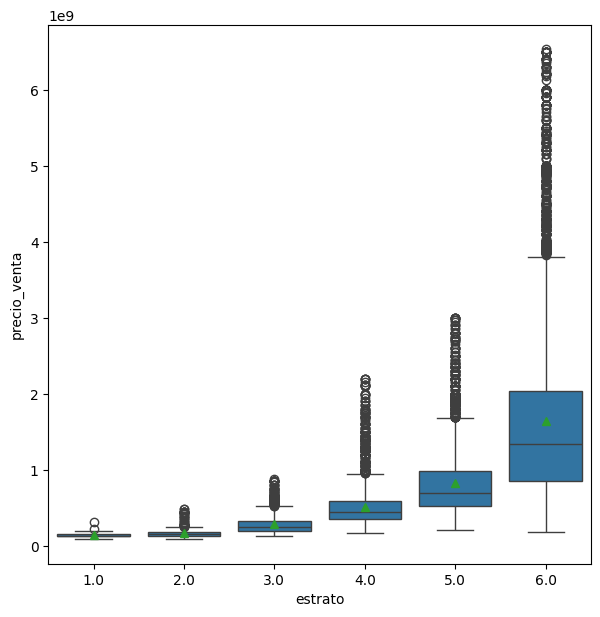

In [96]:
# Plotting Wage by club
plt.figure(figsize=(7, 7))
ax = sns.boxplot(
    data=df_limpio#.loc[df["estrato"].isin([2,3])]
    ,
    x='estrato',
    y='precio_venta',
    showmeans=True
)


plt.show()

Se observa un comportamiento coherente de los precios de venta por estrato, donde las medias de los estratos más altos superan a las de los estratos más bajos, como sería esperado.
Además, gracias al proceso de limpieza de atípicos, los intervalos de precio correspondientes a cada estrato muestran una separación más definida y consistente.

In [97]:
tabla_estadisticas = (
    df_limpio.groupby("estrato")["precio_venta"]
      .describe(percentiles= [0.25, 0.5, 0.75, 0.99] )    # count, mean, std, min, quartiles, max
      .reset_index()
)

tabla_estadisticas

,estrato,count,mean,std,min,25%,50%,75%,99%,max
0,1,51,"148,328,521","35,818,799","92,000,000","130,402,322","134,640,000","162,000,000","271,248,000","320,000,000"
1,2,870,"165,508,944","52,735,857","88,000,000","133,000,000","158,100,000","179,900,000","433,100,000","485,000,000"
2,3,"3,263","281,841,379","110,651,592","127,069,414","198,000,000","255,000,000","330,000,000","662,830,412","880,000,000"
3,4,"5,628","509,026,360","249,654,193","170,000,000","350,000,000","450,000,000","590,000,000","1,550,000,000","2,200,000,000"
4,5,"5,174","827,775,010","436,295,688","210,000,000","520,000,000","700,000,000","985,000,000","2,413,500,000","3,000,000,000"
5,6,"11,860","1,638,934,563","1,087,356,738","180,000,000","853,024,000","1,340,000,000","2,040,000,000","5,500,000,000","6,530,910,000"


In [98]:
df_limpio.shape

(26846, 52)

<span style="color:red; font-weight:bold;"> Como resultado de este proceso de depuración y control de calidad, el dataset queda conformado por 26846 inmuebles de tipo apartamento usado </span>

En este punto se procede plotear las variables cuantitativas


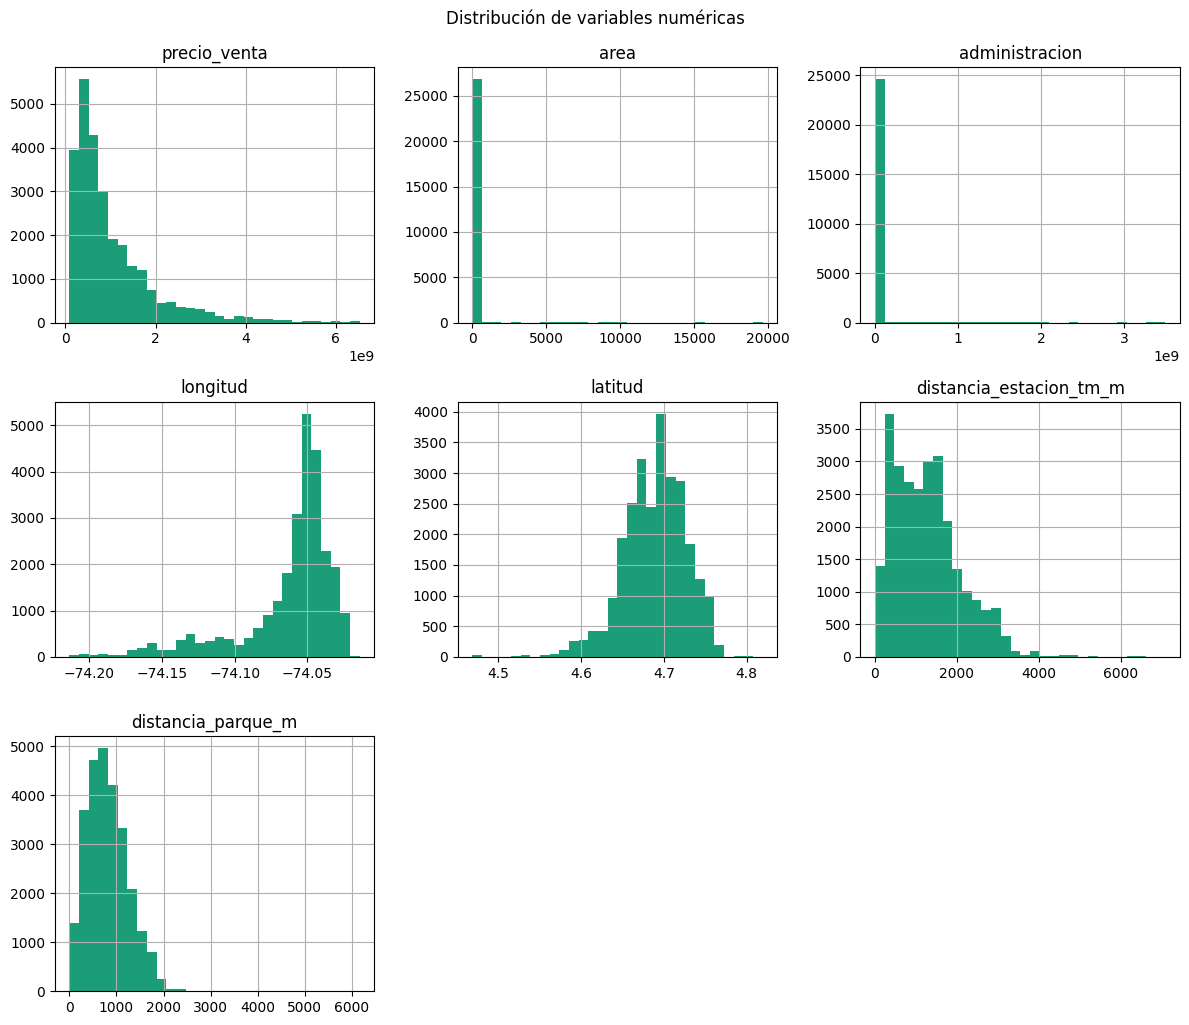

In [99]:
# Histogramas de variables numéricas
pd.set_option('display.float_format', '{:,.0f}'.format)

columnas_numericas = ['precio_venta','area','administracion','longitud','latitud','distancia_estacion_tm_m','distancia_parque_m']
df_limpio[columnas_numericas].hist(bins=30, figsize=(12,10), color='#1b9e77')
plt.tight_layout()
plt.suptitle('Distribución de variables numéricas', y=1.02)
plt.show()



In [100]:
df_limpio[['precio_venta','area','administracion','longitud','latitud',
           'distancia_estacion_tm_m','distancia_parque_m']].describe(percentiles=[0.002,0.01,0.05,0.25,0.5,0.75,0.9,0.999])

,precio_venta,area,administracion,longitud,latitud,distancia_estacion_tm_m,distancia_parque_m
count,"26,846","26,846","24,704","26,846","26,846","26,846","26,846"
mean,"1,030,197,353",142,"5,046,574",-74,5,"1,282",817
std,"946,557,425",234,"76,633,199",0,0,837,443
min,"88,000,000",0,1,-74,4,5,0
0.2%,"114,690,000",18,"10,000",-74,5,38,38
1%,"135,000,000",29,"10,000",-74,5,112,87
5%,"188,834,071",43,"110,000",-74,5,237,202
25%,"410,000,000",70,"350,000",-74,5,586,490
50%,"705,000,000",110,"650,000",-74,5,"1,195",765
75%,"1,300,000,000",180,"1,178,000",-74,5,"1,728","1,092"


In [101]:
# outliers de area menor a 0.002 o mayores a 0.99

df_outliers = df_limpio[(df_limpio["area"] < df_limpio["area"].quantile(0.002)) | 
                 (df_limpio["area"] > df_limpio["area"].quantile(0.999))]

df_outliers

# Dataset limpio
df_limpio = df_limpio[(df_limpio["area"] > df_limpio["area"].quantile(0.002))  & 
              (df_limpio["area"] < df_limpio["area"].quantile(0.999))]

print("Atípicos eliminados por area:", len(df_outliers))


### revisar la posibilidad de limpiar estratos 4,5,6 con precios muy bajos (0.3% - 99%)

Atípicos eliminados por area: 78


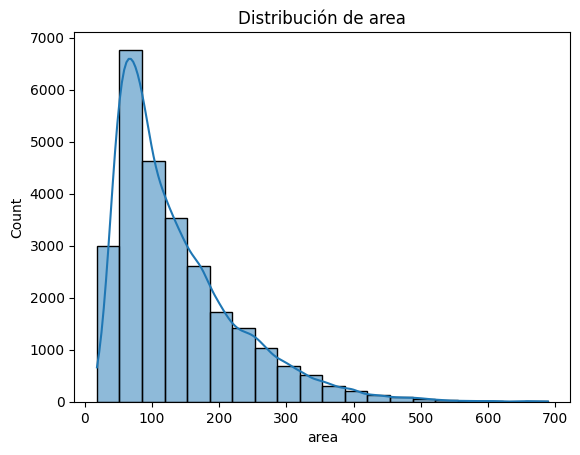

In [102]:
sns.histplot(df_limpio['area'], bins=20, kde=True)
plt.title('Distribución de area')
plt.xlabel('area')
plt.show()

In [314]:
# outliers de administración menor a 0.002 o mayores a 0.99

df_outliers = df_limpio[(df_limpio["administracion"] < df_limpio["administracion"].quantile(0.002)) | 
                 (df_limpio["administracion"] > df_limpio["administracion"].quantile(0.999))]

df_outliers

# Dataset limpio
df_limpio = df_limpio[(df_limpio["administracion"] > df_limpio["administracion"].quantile(0.002))  & 
              (df_limpio["administracion"] < df_limpio["administracion"].quantile(0.999))]

print("Atípicos eliminados por administración:", len(df_outliers))


### revisar la posibilidad de limpiar estratos 4,5,6 con precios muy bajos (0.3% - 99%)

Atípicos eliminados por administración: 72


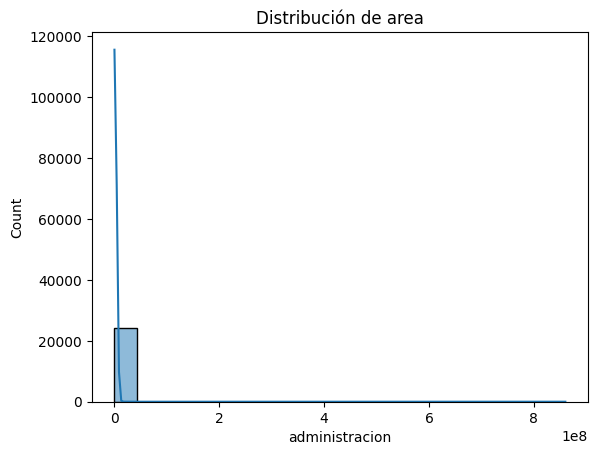

In [315]:
sns.histplot(df_limpio['administracion'], bins=20, kde=True)
plt.title('Distribución de area')
plt.xlabel('administracion')
plt.show()

Dado que nuestro modelo tiene el obejtivo de predecir el valor de venta para inmuebles de tipo apartamento, vale la pena aterrizar la realidad de los apartamentos en bogotá en donde un intervalo valido como lo evidencian las estadisticas, son apartamentos de 18 metros cuadrados a 700 metros. 

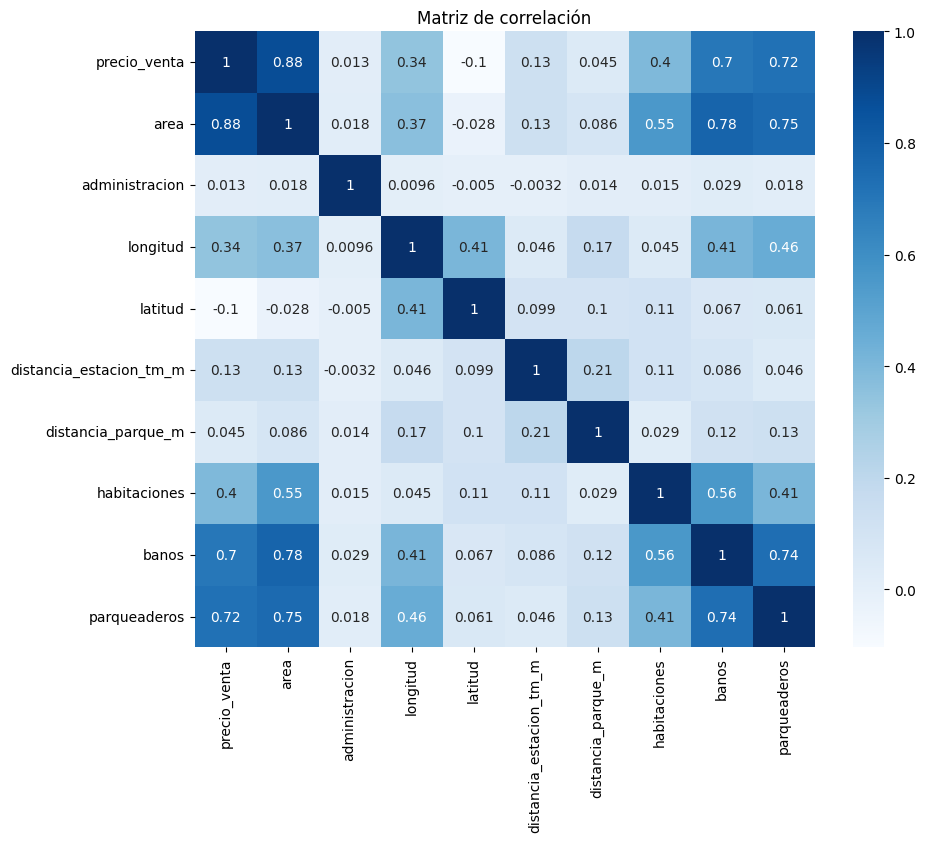

In [104]:
import numpy as np
correlation = df_limpio[['precio_venta','area','administracion','longitud','latitud',
           'distancia_estacion_tm_m','distancia_parque_m','habitaciones','banos','parqueaderos']].corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation, annot=True, cmap='Blues')
plt.title('Matriz de correlación')
plt.show()

Esta matriz de correlación nos permite evidenciar que existe una relacion directa entre precio de venta y area, también vemos una relacion directa con longitud y en medor medida con distancia a transmilenio.

In [105]:
# Revision de variables booleanas
boolean_columns = ['jacuzzi','piscina','salon_comunal','terraza',
                   'vigilancia','chimenea','permite_mascotas','gimnasio',
                   'ascensor','conjunto_cerrado','coords_modified','is_cerca_estacion_tm','is_cerca_parque']

for col in boolean_columns:
    print(f'Valores únicos en {col}: {df_limpio[col].unique()}')



tabla = {}

for col in boolean_columns:
    tabla[col] = df_limpio[col].value_counts(dropna=False)

tabla_value_counts = pd.DataFrame(tabla).fillna(0).astype(int)
tabla_value_counts


Valores únicos en jacuzzi: [ 0.  1. nan]
Valores únicos en piscina: [ 0.  1. nan]
Valores únicos en salon_comunal: [ 0. nan]
Valores únicos en terraza: [ 0.  1. nan]
Valores únicos en vigilancia: [ 0.  1. nan]
Valores únicos en chimenea: [ 0. nan]
Valores únicos en permite_mascotas: [ 0. nan]
Valores únicos en gimnasio: [ 0.  1. nan]
Valores únicos en ascensor: [ 0.  1. nan]
Valores únicos en conjunto_cerrado: [ 1.  0. nan]
Valores únicos en coords_modified: [False  True]
Valores únicos en is_cerca_estacion_tm: [0 1]
Valores únicos en is_cerca_parque: [1 0]


,jacuzzi,piscina,salon_comunal,terraza,vigilancia,chimenea,permite_mascotas,gimnasio,ascensor,conjunto_cerrado,coords_modified,is_cerca_estacion_tm,is_cerca_parque
0,23076,21861,24355,24324,9510,24355,24355,16414,8175,13584,23873,19467,18030
1,1279,2494,0,31,14845,0,0,7941,16180,10771,484,4890,6327
NaN,2,2,2,2,2,2,2,2,2,2,0,0,0


In [106]:
df_limpio.columns

Index(['_id', 'codigo', 'tipo_propiedad', 'tipo_operacion', 'precio_venta',
       'area', 'habitaciones', 'banos', 'administracion', 'parqueaderos',
       'sector', 'estrato', 'antiguedad', 'latitud', 'longitud', 'direccion',
       'descripcion', 'website', 'last_view', 'datetime', 'url', 'timeline',
       'estado', 'compañia', 'precio_arriendo', 'jacuzzi', 'piso', 'closets',
       'chimenea', 'permite_mascotas', 'gimnasio', 'ascensor',
       'conjunto_cerrado', 'piscina', 'salon_comunal', 'terraza', 'vigilancia',
       'coords_modified', 'localidad', 'barrio', 'estacion_tm_cercana',
       'distancia_estacion_tm_m', 'is_cerca_estacion_tm', 'parque_cercano',
       'distancia_parque_m', 'is_cerca_parque', 'ratio_inmobiliario',
       'estrato_inconsistente', 'estrato_moda', 'diferencia', 'p99', 'p003'],
      dtype='object')

<span style="color:red; font-weight:bold;">A partir de el entendimiento de los datos presentado anteriormente se eligen las siguientes variables para la etapa de modelado</span>  

* Variables categoricas: sector,estrato,antiguedad,localidad
* Variables numericas: area,administracion,longitud,latitud,distancia_estacion_tm_m,distancia_parque_m,habitaciones,banos,parqueaderos
* Variables categoricas binarias: jacuzzi, piscina, terraza, vigilancia,	gimnasio,	ascensor,	conjunto_cerrado,	is_cerca_estacion_tm, is_cerca_parque

## Modelado

1. crear el traint, test y validation
2. Crear al menos dos modelos distintos para predecir el precio_venta
3. Metricas
4. Elegir un modelo y jsutificarlo, oportunidades de mejora
5. interpretabilidad shapley line 
6. generacion de valor 
7. insights

### Divisón de los datos
Se dividirán los datos en dos subconjuntos, uno para la fase de entrenamiento y otro para validar las métricas del modelo.

Asimismo, los datos que se usarán en entrenamiento se dividirán mediante validación cruzada, usando 20 divisiones

In [256]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import root_mean_squared_error, r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [162]:
X= df_limpio.drop(columns=['precio_venta','tipo_propiedad','tipo_operacion','direccion','chimenea','permite_mascotas', 'salon_comunal', 'precio_arriendo', 'closets','barrio','piso','estacion_tm_cercana','parque_cercano',
                         'estrato_moda','diferencia','p99','p003','_id','codigo','estrato_inconsistente','descripcion', 
                         'website', 'last_view', 'datetime', 'url', 'timeline','estado', 'compañia','coords_modified',
                         'ratio_inmobiliario' #puede darle pista al modelo
                         ])

y= df_limpio['precio_venta']
print("Las caracteristicas iniciales del dataset son:\n", X.columns , "\nPara describir la variable", y.name)

Las caracteristicas iniciales del dataset son:
 Index(['area', 'habitaciones', 'banos', 'administracion', 'parqueaderos',
       'sector', 'estrato', 'antiguedad', 'latitud', 'longitud', 'jacuzzi',
       'gimnasio', 'ascensor', 'conjunto_cerrado', 'piscina', 'terraza',
       'vigilancia', 'localidad', 'distancia_estacion_tm_m',
       'is_cerca_estacion_tm', 'distancia_parque_m', 'is_cerca_parque'],
      dtype='object') 
Para describir la variable precio_venta


In [163]:
# Se divide el conjunto inicialmente en train (70%) y validation (30%)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.30, random_state=42)


### Entrenamiento de los modelos

A partir de las variables seleccionadas en la etapa exploratoria, <span style="color:red; font-weight:bold;">se evaluarán diferentes modelos para decidir si incluir las variables dummy correspondientes a antiguedad, sector y localidad </span>.

Estos modelos se compararán entre sí usando el error cuadrático promedio.

La información se dividió en dos subconjuntos:
* Train (70%)
* Validación (30%)

Durante el entrenamiento se usará validación cruzada con 20 subdivisiones, de forma que en cada iteración se usará 66.5% para entrenamiento y un 3.5% para test

Adicionalmente, se evaluará si usar un escalado estándar mejora el rendimiento del modelo.

Se evaluará una regresión estándar y una regresión con regularización de Ridge.

In [ ]:
def entrenar_modelos(X_input, y_input, sector, antiguedad, localidad, escalado_estandar, modelo, hiperparametros):
    df = X_input.copy()
    y=y_input.copy()

    df['precio']=y

    print(f'El dataset tiene {df.shape[1]} variables antes de convertir las categorías a dummies')

    cat_cols = []

    if sector:
        cat_cols.append('sector')
    else:
        df = df.drop(columns=["sector"])

    if antiguedad:
        cat_cols.append('antiguedad')
    else:
        df = df.drop(columns=["antiguedad"])

    if localidad:
        cat_cols.append('localidad')
    else:
        df = df.drop(columns=["localidad"])

    num_cols = [c for c in df.columns if c not in cat_cols and c != 'precio']

    transformers=[]
    if cat_cols:
        transformers.append(
            ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols)
        )
    
    if escalado_estandar:
        transformers.append(
            ("num", StandardScaler(), num_cols)
        )
    else:
        transformers.append(
            ("num", "passthrough", num_cols)
        )

    preprocess = ColumnTransformer(
        transformers=transformers,
        remainder="drop"
    )

    pipe = Pipeline([
        ("preprocess", preprocess),
        ("reg", modelo)
    ])

    print(f'El dataset tiene {df.shape[0]} entradas antes de eliminar nulos')
    df=df.dropna()
    print(f'El dataset tiene {df.shape[0]} entradas después de eliminar nulos')

    X = df.drop(columns=['precio'])
    y = df['precio']
    
    search = GridSearchCV(
        estimator=pipe,
        param_grid=hiperparametros,
        cv=20,
        scoring='neg_root_mean_squared_error'
    )

    search.fit(X, y)

    return [search, pipe]
    

### Regresión lineal

In [269]:
import itertools
combinations = list(itertools.product([True, False], repeat=4))

In [283]:
best_linear_results = {}

param_grid_lr = {
    "reg__fit_intercept":[True]
}

i=0
best_score=10000000000000
best_combo=""
best_comb_index=-1
for comb in combinations:
    description = f"Modelo {i}: {'SECTOR' if comb[0] else 'SIN INCLUIR SECTOR'} | {'ANTIGÜEDAD' if comb[1] else 'SIN INCLUIR ANTIGÜEDAD'} | {'LOCALIDAD' if comb[2] else 'SIN INCLUIR LOCALIDAD'} | {'STD SCALER' if comb[3] else 'NO SCALER'}"
    print(description)
    results = entrenar_modelos(
        X_input=X_train,
        y_input=y_train,
        sector=comb[0],
        antiguedad=comb[1],
        localidad=comb[2],
        escalado_estandar=comb[3],
        modelo = LinearRegression(),
        hiperparametros = param_grid_lr)
    result = results[0]
    print(result.best_params_)
    print(f'RMSE (raíz del error cuadrático medio): {-result.best_score_:.2f}')
    best_linear_results[i]=results

    if -result.best_score_ < best_score:
        best_score = -result.best_score_
        best_combo=description
        best_comb_index=i
    print('--'*20)
    i+=1

Modelo 0: SECTOR | ANTIGÜEDAD | LOCALIDAD | STD SCALER
El dataset tiene 23 variables antes de convertir las categorías a dummies
El dataset tiene 17049 entradas antes de eliminar nulos
El dataset tiene 16580 entradas después de eliminar nulos
{'reg__fit_intercept': True}
RMSE (raíz del error cuadrático medio): 373217986.73
----------------------------------------
Modelo 1: SECTOR | ANTIGÜEDAD | LOCALIDAD | NO SCALER
El dataset tiene 23 variables antes de convertir las categorías a dummies
El dataset tiene 17049 entradas antes de eliminar nulos
El dataset tiene 16580 entradas después de eliminar nulos
{'reg__fit_intercept': True}
RMSE (raíz del error cuadrático medio): 487856823.54
----------------------------------------
Modelo 2: SECTOR | ANTIGÜEDAD | SIN INCLUIR LOCALIDAD | STD SCALER
El dataset tiene 23 variables antes de convertir las categorías a dummies
El dataset tiene 17049 entradas antes de eliminar nulos
El dataset tiene 16580 entradas después de eliminar nulos
{'reg__fit_int

In [284]:
print(best_score)
print(best_combo)
print(best_comb_index)

373217986.7317649
Modelo 0: SECTOR | ANTIGÜEDAD | LOCALIDAD | STD SCALER
0


### Regresión lineal con regularización de Ridge

In [285]:
combinations = list(itertools.product([True, False], repeat=3))

In [287]:
best_ridge_results = {}

param_grid_ridge = {
    "reg__alpha": [0.01, 0.1, 1, 10, 100, 300, 1000]
}

i=0
best_score=10000000000000
best_combo=""
best_comb_index_2=-1
for comb in combinations:
    description = f"Modelo {i}: {'SECTOR' if comb[0] else 'SIN INCLUIR SECTOR'} | {'ANTIGÜEDAD' if comb[1] else 'SIN INCLUIR ANTIGÜEDAD'} | {'LOCALIDAD' if comb[2] else 'SIN INCLUIR LOCALIDAD'} | {'STD SCALER' if True else 'NO SCALER'}"
    print(description)
    results = entrenar_modelos(
        X_input=X_train,
        y_input=y_train,
        sector=comb[0],
        antiguedad=comb[1],
        localidad=comb[2],
        escalado_estandar=True,
        modelo = Ridge(),
        hiperparametros = param_grid_ridge)
    result = results[0]
    print(result.best_params_)
    print(f'RMSE (raíz del error cuadrático medio): {-result.best_score_:.2f}')
    best_ridge_results[i]=results

    if -result.best_score_ < best_score:
        best_score = -result.best_score_
        best_combo=description
        best_comb_index_2=i
    print('--'*20)
    i+=1

Modelo 0: SECTOR | ANTIGÜEDAD | LOCALIDAD | STD SCALER
El dataset tiene 23 variables antes de convertir las categorías a dummies
El dataset tiene 17049 entradas antes de eliminar nulos
El dataset tiene 16580 entradas después de eliminar nulos
{'reg__alpha': 0.1}
RMSE (raíz del error cuadrático medio): 373215870.96
----------------------------------------
Modelo 1: SECTOR | ANTIGÜEDAD | SIN INCLUIR LOCALIDAD | STD SCALER
El dataset tiene 23 variables antes de convertir las categorías a dummies
El dataset tiene 17049 entradas antes de eliminar nulos
El dataset tiene 16580 entradas después de eliminar nulos
{'reg__alpha': 0.1}
RMSE (raíz del error cuadrático medio): 373423097.24
----------------------------------------
Modelo 2: SECTOR | SIN INCLUIR ANTIGÜEDAD | LOCALIDAD | STD SCALER
El dataset tiene 23 variables antes de convertir las categorías a dummies
El dataset tiene 17049 entradas antes de eliminar nulos
El dataset tiene 16587 entradas después de eliminar nulos
{'reg__alpha': 0.1}

In [288]:
print(best_score)
print(best_combo)
print(best_comb_index_2)

373215870.95951086
Modelo 0: SECTOR | ANTIGÜEDAD | LOCALIDAD | STD SCALER
0


### Pruebas con datos de validación

In [ ]:
# Modelo: SECTOR | ANTIGÜEDAD | LOCALIDAD | STD SCALER
best_linreg = best_linear_results[best_comb_index][0].best_estimator_


# Modelo: SECTOR | ANTIGÜEDAD | LOCALIDAD | STD SCALER
best_ridge = best_ridge_results[best_comb_index_2][0].best_estimator_

In [329]:
def test_modelos(X, y, sector, antiguedad, localidad, modelo):
    df = X.copy()

    df['precio']=y

    cat_cols = []

    if sector:
        cat_cols.append('sector')
    else:
        df = df.drop(columns=["sector"])

    if antiguedad:
        cat_cols.append('antiguedad')
    else:
        df = df.drop(columns=["antiguedad"])

    if localidad:
        cat_cols.append('localidad')
    else:
        df = df.drop(columns=["localidad"])


    print(f'El dataset tiene {df.shape[0]} entradas antes de eliminar nulos')
    df=df.dropna()
    print(f'El dataset tiene {df.shape[0]} entradas después de eliminar nulos')

    X = df.drop(columns=['precio'])
    y = df['precio']

    y_pred = modelo.predict(X)
    rmse = root_mean_squared_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    mae = mean_absolute_error(y,y_pred)

    print(f'RMSE (raíz del error cuadrático medio): {rmse:.2f}')
    print(f'R^2: {r2:.6f}')
    print(f'MAE (error absoluto promedio): {mae:.2f}')

    return y, y_pred

In [331]:
_, _ = test_modelos(X=X_val, y=y_val, sector=True, antiguedad=True, localidad=True, modelo=best_linreg)

El dataset tiene 7308 entradas antes de eliminar nulos
El dataset tiene 7117 entradas después de eliminar nulos
RMSE (raíz del error cuadrático medio): 380383183.34
R^2: 0.834975
MAE (error absoluto promedio): 235143146.89


In [332]:
_, _ = test_modelos(X=X_val, y=y_val, sector=True, antiguedad=True, localidad=True, modelo=best_ridge)

El dataset tiene 7308 entradas antes de eliminar nulos
El dataset tiene 7117 entradas después de eliminar nulos
RMSE (raíz del error cuadrático medio): 380385694.82
R^2: 0.834973
MAE (error absoluto promedio): 235091187.95


Se probaron diferentes pasos de preprocesamiento y se comparó su capacidad para predecir el precio de los inmuebles mediante el error promedio cuadrado (RMSE). Se probaron dos modelos: una regresión lineal y una regresión lineal con normalización de Ridge.

Así, los modelos elegidos fueron los siguientes

| Tipo de inmueble       | incluye localidad (dummy) | Incluye antigüedad (dummy) | Incluye sector (dummy)  | Modelo                     | RMSE promedio en entrenamiento | Test RMSE             |
|------------------------|---------------------------|----------------------------|-------------------------|----------------------------|--------------------|-----------------------|
| Apartamentos           | Sí                        | Si                         | Si                      | Regresión lineal           |  $ 373.217.986,73  |      $ 380.383.183,34 |
| Apartamentos           | Sí                        | Si                         | Si                      | Regresión lineal con Ridge |  $ 373.215.870,95  |      $ 380.385.694,82 |

## Análisis del modelo seleccionado

### Análisis cuantitativo



El modelo elegido es la regresión lineal sin regularizaciones que incluye la localidad, la antiguedad y el sector, pues presentó un mejor error cuadrado promedio en comparación con los otros modelos. Sin embargo, es importante notar que el desempeño entre el modelo sin y con regularización fue muy similar, con una diferencia de aprox. $2.000 pesos en su RMSE y aprox. $100.000 en su MAE. Siendo que estos valores corresponden a precios de inmuebles, es una diferencia despreciable.

Se observó que incluir las variables dummy tuvo un impacto positivo en el desempeño del modelo:
- Localidad (mejora ~$ 200.000 el RMSE)
- Antigüedad (mejora ~$ 20.000.000 el RMSE)
- Sector (mejora ~$ 3.000.000 el RMSE)


Así, se observa un desempeño adecuado del modelo:

R² = 0.839, lo cual indica que aproximadamente el 83% de la variabilidad del precio de venta está explicada por las variables independientes incluidas en el modelo. Para un mercado inmobiliario tan heterogéneo como el de Bogotá, este nivel de explicación es consistente con un modelo lineal.

El Error Absoluto Promedio (MAE) es de 235 millones y el la raíz del Error Cuadrado Promedio (RMSE) es de 380 millones, lo cuál es aproximadamente 25% y 41% de la desviación estándar respectivamente. <span style="color:red; font-weight:bold;">Esto sugiere que el error del modelo está en un rango menor que la dispersión natural de los precios, lo que es deseable.
 </span> Sin embargo, debe tenerse en cuenta que hay algunas predicciones outliers con un error mucho mayor.
 
El RMSE es mayor que el MAE. Esto indica que existen casos particulares donde el modelo se equivoca de forma más pronunciada. <span style="color:red; font-weight:bold;">Vale la pena validar si estas varaiciones se presentan mas en sectores o inmuebles con caracteristicas especificas. </span>

In [337]:
y_valid, y_valid_pred = test_modelos(X=X_val, y=y_val, sector=True, antiguedad=True, localidad=True, modelo=best_linreg)

El dataset tiene 7308 entradas antes de eliminar nulos
El dataset tiene 7117 entradas después de eliminar nulos
RMSE (raíz del error cuadrático medio): 380383183.34
R^2: 0.834975
MAE (error absoluto promedio): 235143146.89


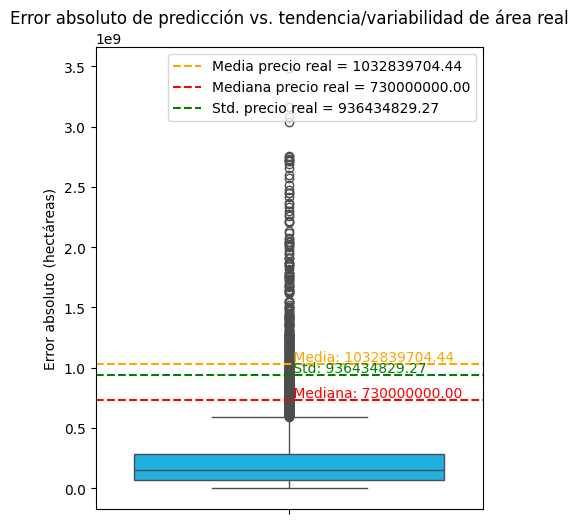

In [377]:
# Boxplot de errores absolutos contra medias y dispersión de area_capped
errores_absolutos = np.abs(y_valid - y_valid_pred)
media_precio = y_valid.mean()
mediana_precio = y_valid.median()
std_precio = y_valid.std()

plt.figure(figsize=(5,6))
sns.boxplot(y=errores_absolutos, color='deepskyblue')
plt.title('Error absoluto de predicción vs. tendencia/variabilidad de área real')
plt.ylabel('Error absoluto (hectáreas)')

plt.axhline(media_precio, color='orange', linestyle='--', label=f"Media precio real = {media_precio:.2f}")
plt.axhline(mediana_precio, color='red', linestyle='--', label=f"Mediana precio real = {mediana_precio:.2f}")
plt.axhline(std_precio, color='green', linestyle='--', label=f"Std. precio real = {std_precio:.2f}")

plt.text(0, media_precio, f" Media: {media_precio:.2f}", color='orange', va='bottom')
plt.text(0, mediana_precio, f" Mediana: {mediana_precio:.2f}", color='red', va='bottom')
plt.text(0, std_precio, f" Std: {std_precio:.2f}", color='green', va='bottom')

plt.legend()
plt.show()

In [414]:
# Análisis de residuos

pd.set_option("display.precision", 6)

residuos = y_valid_pred - y_valid

df_valid_results = pd.DataFrame({
    "precio_real": y_valid,
    "precio_predicho": y_valid_pred,
    "residuo": residuos
})

df_valid_results["requiere_perito"] = np.where(
    df_valid_results["residuo"] <= -20_000_000,
    'Sí',  # requiere_perito
    'No '  # Costo_cero
)

print ("Porcentajes de clasificaciones en validación:")
print(df_valid_results["requiere_perito"].value_counts(normalize=True) * 100)

df_valid_results.head()

Porcentajes de clasificaciones en validación:
requiere_perito
No    56
Sí    44
Name: proportion, dtype: float64


,precio_real,precio_predicho,residuo,requiere_perito
3059,"928,000,000","1,040,006,069","112,006,069",No
24477,"458,283,680","385,712,971","-72,570,709",Sí
21682,"670,000,000","683,935,332","13,935,332",No
3611,"1,150,000,000","1,276,687,027","126,687,027",No
5226,"1,600,000,000","1,762,466,422","162,466,422",No


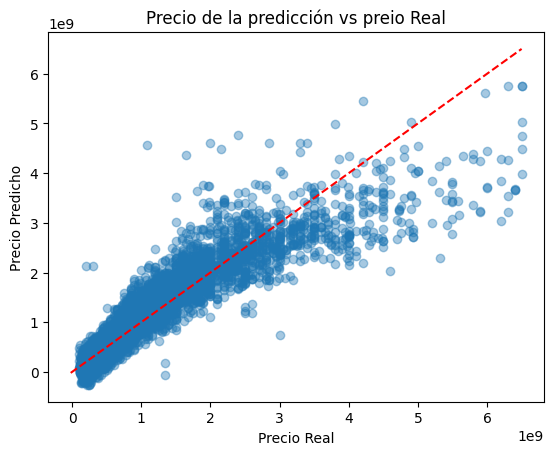

In [380]:
plt.scatter(y_valid, y_valid_pred, alpha=0.4)

# Diagonal del límite para solicitar avalúo presencial
d = np.linspace(-20000000, 6500000000, 100000000)
d1=d
plt.plot(d, d1, color='red', linestyle='--')

plt.xlabel("Precio Real")
plt.ylabel("Precio Predicho")
plt.title("Precio de la predicción vs preio Real")
plt.show()

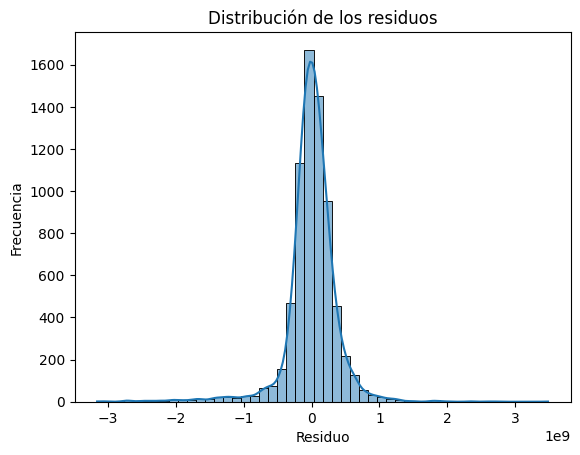

In [372]:
sns.histplot(residuos, bins=50, kde=True)
plt.title("Distribución de los residuos")
plt.xlabel("Residuo")
plt.ylabel("Frecuencia")
plt.show()

Al analizar los residuos definidos como la diferencia entre el valor predicho y el valor real (del conjunto de validación) se identificó que:

<span style="color:red; font-weight:bold;">El 56% de los casos del conjunto de validación cumple la restricción del negocio no existe una subestimación mayor a 20 millones. </span>

Esto implica que:

* El modelo tiende a sobreestimar ligeramente los precios, lo cual es deseable en este caso porque evita costos adicionales asociados al peritaje que se genera cuando el precio predicho es demasiado bajo.

Tambien se púede identificar en la dispersión de los errores que esta es lineal.

Es pertinente analizar si las subestimaciones superiores a 20 millones se concentran en ciertos rangos de precio, o en ciertos barrios o localidades, o en inmuebles con características particulares (área, antigüedad, estar en un conjunto cerrado o estratos particulares).

Esta revisión permitiría delimitar los segmentos donde el modelo funciona bien y aquellos donde se deteriora, para evaluar ajustes o incluso entrenar un modelo especializado para ciertos nichos (por ejemplo, apartamentos de precios inferiores a 3.000 millones).

In [418]:
df_valid_results["rango_precio"] = pd.cut(
    df_valid_results["precio_real"],
    bins=[0, 400_000_000, 800_000_000, 1_500_000_000, 3_000_000_000, 5_000_000_000, float("inf")],
    labels=["0-400M", "400-800M", "800-1500M", "1500-3000M", "3000-5000M", "5000M+"]
)

# Rangos de precios con subestimaciones mayores a 20 millones

print(pd.crosstab(
    df_valid_results["rango_precio"],
    df_valid_results["requiere_perito"],
    normalize="index"   # normaliza por fila
) * 100)

requiere_perito  No   Sí
rango_precio            
0-400M            40  60
400-800M          60  40
800-1500M         74  26
1500-3000M        55  45
3000-5000M         9  91
5000M+             0 100


In [516]:
def variable_vs_requiere_perito(df, col, label, sort=False, size=None):
    contingency_table = pd.crosstab(
        df['requiere_perito'],
        df[col] 
    )
    
    n=len(contingency_table.columns.tolist())
    percentages = contingency_table.div(contingency_table.sum(axis=0), axis=1) * 100
    annot = contingency_table.astype(str) + " (" + percentages.round(1).astype(str) + "%)"

    if sort:
        row_to_sort = "Sí"
        sorted_cols = percentages.loc[row_to_sort].sort_values(ascending=False).index

        percentages = percentages[sorted_cols]
        contingency_table = contingency_table[sorted_cols]
        annot = annot[sorted_cols]

    if size:
        plt.figure(figsize=size)

    sns.heatmap(percentages, annot=annot, fmt="", cmap="YlGnBu")

    plt.xticks([i+0.5 for i in range(n)], percentages.columns.tolist())
    plt.yticks([i+0.5 for i in range(2)], ['No', 'Sí'], rotation=0)

    plt.title(f"{label} vs. valoracion presencial")
    plt.xlabel(label)
    plt.ylabel('Requiere valoracion presencial')
    plt.show()

In [512]:
df_not_na = X_val.copy()
df_not_na = df_not_na.dropna()

df_not_na = pd.concat([df_not_na, df_valid_results], axis=1)

ct = pd.crosstab(
    df_not_na["localidad"],
    df_not_na["requiere_perito"],
    normalize="index"   # normaliza por fila
) * 100
display(ct.sort_values(by="Sí", ascending=False))

requiere_perito,No,Sí
localidad,,
TUNJUELITO,33,67
USME,38,62
KENNEDY,49,51
SUBA,50,50
BARRIOS UNIDOS,51,49
...,...,...
SAN CRISTOBAL,62,38
CHAPINERO,64,36
LOS MARTIRES,66,34


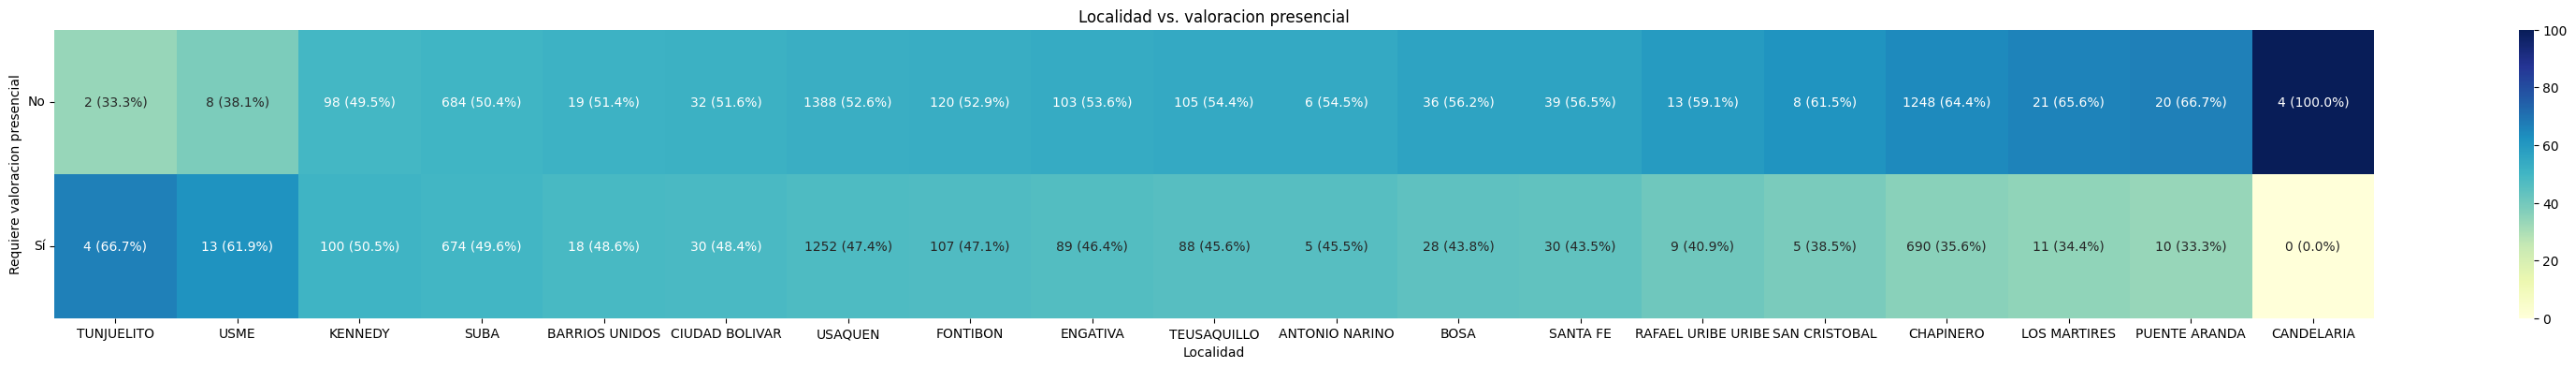

In [517]:
variable_vs_requiere_perito(df_not_na, 'localidad', 'Localidad', True, (40,4))

In [511]:
ct = pd.crosstab(
    df_not_na["estrato"],
    df_not_na["requiere_perito"],
    normalize="index"   # normaliza por fila
) * 100
display(ct.sort_values(by="Sí", ascending=False))

display(X_train["estrato"].value_counts())

requiere_perito,No,Sí
estrato,,
2,45,55
3,48,52
4,50,50
6,58,42
5,61,39
1,100,0


estrato
6    7588
4    3673
5    3326
3    1912
2     520
1      30
Name: count, dtype: int64

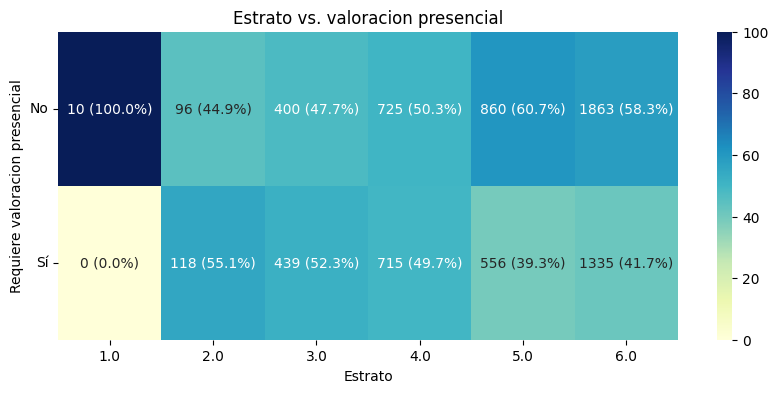

In [518]:
variable_vs_requiere_perito(df_not_na, 'estrato', 'Estrato', False, (10,4))

Se observa una tendencia a subestimar por un valor mayor los inmuebles de precios superiores a 3.000 millones.

Adicionalmente, se observa que en estratos 4, 5 y 6 se tienen ligeramente mejor desempeño que en estrato 2 y 3. Esto puede deberse a que hay un mayor número de muestras para estos estratos tanto en entrenamiento como en validación.

Respecto a la localidad, se ve que Tunjuelito y Usmeson las localidades donde las predicciones del modelo requieren más visitas presenciales. Sin embargo, se ve que esto está sesgado por el número de muestras. En las otras el porcentaje es similar al observado para la muestra de validación.

### Análisis cualitativo

## Análisis de generación de valor para el negocio

Para estimar el valor que se generaría para la empresa se estimarán los costos actuales que los avalúos suponen a la empresa

Actualmente conocemos que los costos de un peritaje son:
$$
Tiempo\ por\ peritaje = 6\ horas \\
Salario\ perito\ por\ hora = \$9.500 \\
Costo\ por\ peritaje = \$9.500 * 6 = \$57.000 \\
$$

Utilizando un modelo preciso, los costos de un peritaje serían:
$$
Tiempo\ por\ peritaje = 1\ hora \\
Salario\ perito\ por\ hora = \$9.500 \\
$$

Con esto, una estimación correcta del modelo supondría un ahorro de

$$
Ahorro\ en\ tiempo\ por\ estimación\ correcta = 6\ horas - 1\ hora = 5\ horas \\
Ahorro\ por\ estimación\ correcta = \$57.000-\$9.500 = \$47.500
$$

Si el avalúo es menor a 20 millones del precio real, se solicita un avalúo presencial. En este caso, suponemos que adicional a las 6 horas que le toma al perito avaluar un inmueble, debe sumarse el tiempo que le tome visitar el predio. Asumimos que esta visita supone 3 horas adicionales al perito. Con esto, cuando hay errores de predicción el costo de un avalúo para a ser:
$$
Tiempo\ por\ peritaje\ con\ visita\ presencial = 9\ horas \\
Salario\ perito\ por\ hora = \$9.500 \\
Costo\ por\ peritaje\ con\ visita\ presencial= \$9.500 * 9 = \$85.500 \\
$$

Considerando que una predicción del modelo es correcta si es máximo inferior al precio real por 20 millones, sabemos que el modelo tiene una exactitud del 56%
$$
Exactitud=56\%
$$
Con esto, la ganacia por predicción esperada es de:
$$
Retorno = Ahorro\ en\ tiempo\ por\ estimación\ correcta-(1-Exactitud)*Costo\ por\ peritaje\ con\ visita\ presencial \\
Retorno = \$47.500-(1-0.56)*\$85.500 \\
Retorno = \$47.500-0.44*\$85.500 \\
Retorno = \$47.500-0.44*\$85.500 \\
Retorno = \$47.500-\$37.620 \\
Retorno = \$9.880 \\
$$

Suponiendo que HabitAlpes revisa 500 apartamentos al mes, se esperaría que se generaran $4.940.000 al mes si se usara este modelo.

Asumiendo que el desarrollo del modelo cuesta $20.000.000, y el despliegue mensual cueste $500.000, a prtir del 5° mes la imple,emtnación del modelo empezaría a dejar dividendos:
$$
Costo\ a\ los\ 5\ meses = 22.000.000 \\
Retorno\ a\ los\ 5\ meses = 24.700.000
$$
